<a href="https://colab.research.google.com/github/ivanmu-1/Python-Portfolio-/blob/main/Patient_Visit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Initial imports:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_visit = pd.read_csv("/Demo Hospital Outpatient Data_NHC.csv")

# Preview dataframe
df_visit

Visit_Date  Patient_ID  Age  Gender  \
0       2020-05-06      688923   68  Female   
1       2018-08-04      886361   62  Female   
2       2021-04-10      464823   70  Female   
3       2021-10-01      655214    8  Female   
4       2018-04-30      454666   24    Male   
...            ...         ...  ...     ...   
999995  2018-09-30      385435    9    Male   
999996  2020-05-08      117261   29  Female   
999997  2019-12-31      594613   39  Female   
999998  2019-11-04      152179   39  Female   
999999  2019-05-11      370584   76  Female   

                                Diagnosis  Has_Insurance  Postcode  \
0                                Diabetes           True     20006   
1                 Urinary Tract Infection          False     20005   
2       Upper Respiratory Tract Infection           True     10003   
3       Upper Respiratory Tract Infection          False     10006   
4                                 Malaria           True     10006   
...                                   ...            ...       ...   
999995                     Abdominal pain           True     10004   
999996            Urinary Tract Infection           True     20009   
999997  Upper Respiratory Tract Infection          False     10001   
999998                            Malaria          False     20006   
999999                            Malaria          False     20012   

        Total_Cost  Registration  Nursing  Laboratory  Consultation  Pharmacy  
0           2274.0            33      105         101            28       112  
1           3430.0            46       75          84           102        36  
2           1836.0           107       81           5            77        36  
3           3250.0            66       31         101            35        92  
4           2262.0            68       55          60            90       104  
...            ...           ...      ...         ...           ...       ...  
999995      1458.0            80       52          11            42        58  
999996      1836.0            59       57          64            66        60  
999997      1930.0            10       14          69            14        86  
999998      3950.0           119       52          60            94        70  
999999      3500.0            34       90          29            97       100  

[1000000 rows x 13 columns]

# Data Cleaning

In [5]:
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Visit_Date     1000000 non-null  object 
 1   Patient_ID     1000000 non-null  int64  
 2   Age            1000000 non-null  int64  
 3   Gender         1000000 non-null  object 
 4   Diagnosis      1000000 non-null  object 
 5   Has_Insurance  1000000 non-null  bool   
 6   Postcode       1000000 non-null  int64  
 7   Total_Cost     1000000 non-null  float64
 8   Registration   1000000 non-null  int64  
 9   Nursing        1000000 non-null  int64  
 10  Laboratory     1000000 non-null  int64  
 11  Consultation   1000000 non-null  int64  
 12  Pharmacy       1000000 non-null  int64  
dtypes: bool(1), float64(1), int64(8), object(3)
memory usage: 92.5+ MB


I noticed that that the Visit_Date column isn't the correct data type. Check to confirm

In [72]:
# Data type is originally a str
type(df_visit['Visit_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
# Convert data type from "object" to "datetime/timestamp"
df_visit['Visit_Date'] = pd.to_datetime(df_visit['Visit_Date'])

In [73]:
# confirm the conversion
type(df_visit['Visit_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Checking if any rows are nulls
df_visit.isna()

Visit_Date  Patient_ID    Age  Gender  Diagnosis  Has_Insurance  \
0            False       False  False   False      False          False   
1            False       False  False   False      False          False   
2            False       False  False   False      False          False   
3            False       False  False   False      False          False   
4            False       False  False   False      False          False   
...            ...         ...    ...     ...        ...            ...   
999995       False       False  False   False      False          False   
999996       False       False  False   False      False          False   
999997       False       False  False   False      False          False   
999998       False       False  False   False      False          False   
999999       False       False  False   False      False          False   

        Postcode  Total_Cost  Registration  Nursing  Laboratory  Consultation  \
0          False       False         False    False       False         False   
1          False       False         False    False       False         False   
2          False       False         False    False       False         False   
3          False       False         False    False       False         False   
4          False       False         False    False       False         False   
...          ...         ...           ...      ...         ...           ...   
999995     False       False         False    False       False         False   
999996     False       False         False    False       False         False   
999997     False       False         False    False       False         False   
999998     False       False         False    False       False         False   
999999     False       False         False    False       False         False   

        Pharmacy  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
999995     False  
999996     False  
999997     False  
999998     False  
999999     False  

[1000000 rows x 13 columns]

In [24]:
# Drop null rows
df_visit.dropna(inplace=True)

Looks Good, no empty rows or null values. Let's check the first 5 rows

In [25]:
df_visit.head()

Visit_Date  Patient_ID  Age  Gender                          Diagnosis  \
0  2020-05-06      688923   68  Female                           Diabetes   
1  2018-08-04      886361   62  Female            Urinary Tract Infection   
2  2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
3  2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
4  2018-04-30      454666   24    Male                            Malaria   

   Has_Insurance  Postcode  Total_Cost  Registration_minutes  Nursing_minutes  \
0           True     20006      2274.0                    33              105   
1          False     20005      3430.0                    46               75   
2           True     10003      1836.0                   107               81   
3          False     10006      3250.0                    66               31   
4           True     10006      2262.0                    68               55   

   Laboratory_minutes  Consultation_minutes  Pharmacy_minutes  
0                 101                    28               112  
1                  84                   102                36  
2                   5                    77                36  
3                 101                    35                92  
4                  60                    90               104

In [26]:
# checking for any duplicate rows
df_visit.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

Everything looks good. However, the columns names are inaccurate. The columns Registration - Pharmacy are recording minutes. We need to fix this


In [109]:

df_visit.rename(columns={"Registration": "Registration_minutes"}, inplace = True)

In [17]:
df_visit.head()

Visit_Date  Patient_ID  Age  Gender                          Diagnosis  \
0  2020-05-06      688923   68  Female                           Diabetes   
1  2018-08-04      886361   62  Female            Urinary Tract Infection   
2  2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
3  2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
4  2018-04-30      454666   24    Male                            Malaria   

   Has_Insurance  Postcode  Total_Cost  Registration_minutes  Nursing  \
0           True     20006      2274.0                    33      105   
1          False     20005      3430.0                    46       75   
2           True     10003      1836.0                   107       81   
3          False     10006      3250.0                    66       31   
4           True     10006      2262.0                    68       55   

   Laboratory  Consultation  Pharmacy  
0         101            28       112  
1          84           102        36  
2           5            77        36  
3         101            35        92  
4          60            90       104

Let's create a dictionary to speed up the process instead of individual modifying each individual column

In [18]:
column_mapping = {"Nursing": "Nursing_minutes", 'Laboratory': "Laboratory_minutes","Consultation": "Consultation_minutes", "Pharmacy": "Pharmacy_minutes"}

In [19]:
df_visit.rename(columns=column_mapping,inplace=True)
df_visit

Visit_Date  Patient_ID  Age  Gender  \
0       2020-05-06      688923   68  Female   
1       2018-08-04      886361   62  Female   
2       2021-04-10      464823   70  Female   
3       2021-10-01      655214    8  Female   
4       2018-04-30      454666   24    Male   
...            ...         ...  ...     ...   
999995  2018-09-30      385435    9    Male   
999996  2020-05-08      117261   29  Female   
999997  2019-12-31      594613   39  Female   
999998  2019-11-04      152179   39  Female   
999999  2019-05-11      370584   76  Female   

                                Diagnosis  Has_Insurance  Postcode  \
0                                Diabetes           True     20006   
1                 Urinary Tract Infection          False     20005   
2       Upper Respiratory Tract Infection           True     10003   
3       Upper Respiratory Tract Infection          False     10006   
4                                 Malaria           True     10006   
...                                   ...            ...       ...   
999995                     Abdominal pain           True     10004   
999996            Urinary Tract Infection           True     20009   
999997  Upper Respiratory Tract Infection          False     10001   
999998                            Malaria          False     20006   
999999                            Malaria          False     20012   

        Total_Cost  Registration_minutes  Nursing_minutes  Laboratory_minutes  \
0           2274.0                    33              105                 101   
1           3430.0                    46               75                  84   
2           1836.0                   107               81                   5   
3           3250.0                    66               31                 101   
4           2262.0                    68               55                  60   
...            ...                   ...              ...                 ...   
999995      1458.0                    80               52                  11   
999996      1836.0                    59               57                  64   
999997      1930.0                    10               14                  69   
999998      3950.0                   119               52                  60   
999999      3500.0                    34               90                  29   

        Consultation_minutes  Pharmacy_minutes  
0                         28               112  
1                        102                36  
2                         77                36  
3                         35                92  
4                         90               104  
...                      ...               ...  
999995                    42                58  
999996                    66                60  
999997                    14                86  
999998                    94                70  
999999                    97               100  

[1000000 rows x 13 columns]

# Demography analysis of patient visit

In [27]:
# Count total records of each genders
df_visit['Gender'].value_counts()

Gender
Male      500108
Female    499892
Name: count, dtype: int64

### Gender Distribution Graph

In [28]:
visit_gender = df_visit['Gender'].value_counts()

Text(0, 0.5, 'Count')

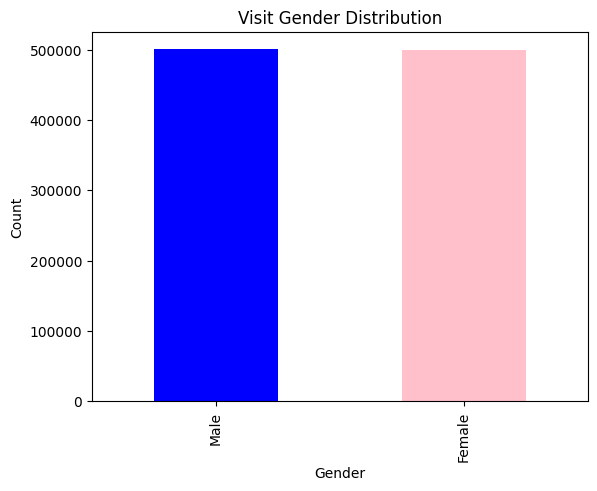

In [32]:
visit_gender.plot(kind='bar', color = ["blue", "pink"])
plt.title("Visit Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

### Age Distrbution Graph:

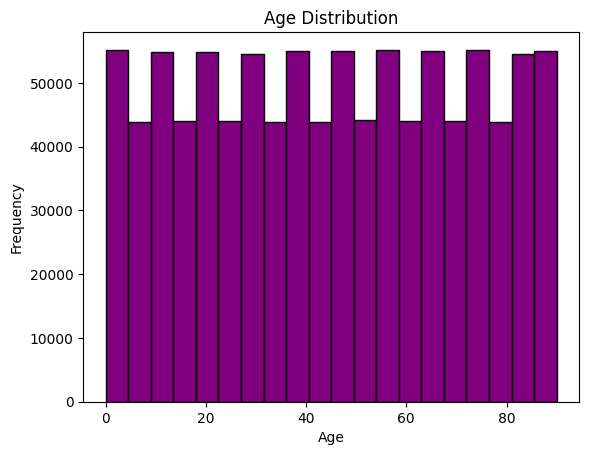

In [47]:
plt.hist(df_visit['Age'],bins=20,color='purple', edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [52]:
df_visit['Age'].max()


90

In [49]:
df_visit['Age'].min()

0

In [50]:
age_bins = [0,10,20,30,40,50,60,70,80,90]


In [53]:
df_visit['Age_Range'] = pd.cut(df_visit["Age"],bins=age_bins)

In [54]:
df_visit.head()

Visit_Date  Patient_ID  Age  Gender                          Diagnosis  \
0  2020-05-06      688923   68  Female                           Diabetes   
1  2018-08-04      886361   62  Female            Urinary Tract Infection   
2  2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
3  2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
4  2018-04-30      454666   24    Male                            Malaria   

   Has_Insurance  Postcode  Total_Cost  Registration_minutes  Nursing_minutes  \
0           True     20006      2274.0                    33              105   
1          False     20005      3430.0                    46               75   
2           True     10003      1836.0                   107               81   
3          False     10006      3250.0                    66               31   
4           True     10006      2262.0                    68               55   

   Laboratory_minutes  Consultation_minutes  Pharmacy_minutes Age_Range  
0                 101                    28               112  (60, 70]  
1                  84                   102                36  (60, 70]  
2                   5                    77                36  (60, 70]  
3                 101                    35                92   (0, 10]  
4                  60                    90               104  (20, 30]

In [62]:
df_visit['Age_Range'].value_counts().sort_index()

Age_Range
(0, 10]     110025
(10, 20]    109930
(20, 30]    109577
(30, 40]    109723
(40, 50]    109960
(50, 60]    110259
(60, 70]    110039
(70, 80]    110051
(80, 90]    109515
Name: count, dtype: int64

In [59]:
age_distribution = df_visit['Age_Range'].value_counts().sort_index()

Text(0, 0.5, 'Frenquency')

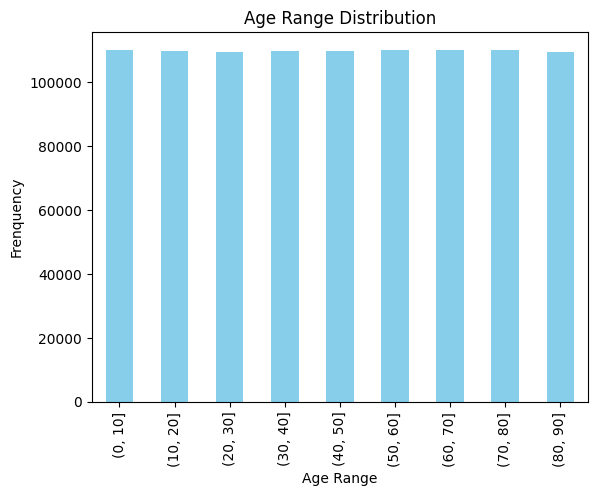

In [61]:
age_distribution.plot(kind='bar',color='skyblue')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frenquency')

In [63]:
postcode_counts = df_visit['Postcode'].value_counts()

In [64]:
postcode_counts

Postcode
10010    46924
10006    46919
10011    46896
10013    46735
10009    46700
10001    46696
10015    46666
10002    46608
10003    46600
10005    46584
10012    46569
10004    46486
10007    46452
10008    46298
10014    46252
20012    20322
20014    20244
20005    20205
20008    20196
20011    20118
20003    20096
20009    20042
20001    20031
20015    20030
20013    19954
20010    19950
20006    19895
20007    19879
20002    19858
20004    19795
Name: count, dtype: int64

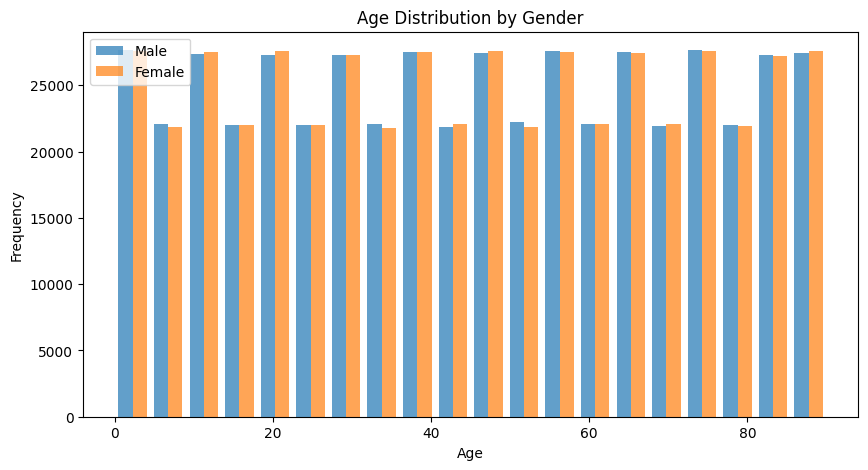

In [67]:
plt.figure(figsize=(10,5))
plt.hist(
    [df_visit[df_visit['Gender'] == 'Male']['Age'], df_visit[df_visit['Gender'] == 'Female']['Age']],
    bins=20,
    label=['Male', 'Female'],
    alpha=0.7
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()

# Trend Analysis of Patient Visits

In [77]:
#Set our index to Visit_date in order to group and aggregate our data
df_visit.set_index('Visit_Date', inplace=True)

KeyError: "None of ['Visit_Date'] are in the columns"

In [80]:
df_visit

Patient_ID  Age  Gender                          Diagnosis  \
Visit_Date                                                               
2020-05-06      688923   68  Female                           Diabetes   
2018-08-04      886361   62  Female            Urinary Tract Infection   
2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
2018-04-30      454666   24    Male                            Malaria   
...                ...  ...     ...                                ...   
2018-09-30      385435    9    Male                     Abdominal pain   
2020-05-08      117261   29  Female            Urinary Tract Infection   
2019-12-31      594613   39  Female  Upper Respiratory Tract Infection   
2019-11-04      152179   39  Female                            Malaria   
2019-05-11      370584   76  Female                            Malaria   

            Has_Insurance  Postcode  Total_Cost  Registration_minutes  \
Visit_Date                                                              
2020-05-06           True     20006      2274.0                    33   
2018-08-04          False     20005      3430.0                    46   
2021-04-10           True     10003      1836.0                   107   
2021-10-01          False     10006      3250.0                    66   
2018-04-30           True     10006      2262.0                    68   
...                   ...       ...         ...                   ...   
2018-09-30           True     10004      1458.0                    80   
2020-05-08           True     20009      1836.0                    59   
2019-12-31          False     10001      1930.0                    10   
2019-11-04          False     20006      3950.0                   119   
2019-05-11          False     20012      3500.0                    34   

            Nursing_minutes  Laboratory_minutes  Consultation_minutes  \
Visit_Date                                                              
2020-05-06              105                 101                    28   
2018-08-04               75                  84                   102   
2021-04-10               81                   5                    77   
2021-10-01               31                 101                    35   
2018-04-30               55                  60                    90   
...                     ...                 ...                   ...   
2018-09-30               52                  11                    42   
2020-05-08               57                  64                    66   
2019-12-31               14                  69                    14   
2019-11-04               52                  60                    94   
2019-05-11               90                  29                    97   

            Pharmacy_minutes Age_Range  
Visit_Date                              
2020-05-06               112  (60, 70]  
2018-08-04                36  (60, 70]  
2021-04-10                36  (60, 70]  
2021-10-01                92   (0, 10]  
2018-04-30               104  (20, 30]  
...                      ...       ...  
2018-09-30                58   (0, 10]  
2020-05-08                60  (20, 30]  
2019-12-31                86  (30, 40]  
2019-11-04                70  (30, 40]  
2019-05-11               100  (70, 80]  

[1000000 rows x 13 columns]

In [81]:
# Resample the df to group data by year and aggregate data to perform an yearly trend of visits
df_resample_year = df_visit.resample('Y').count()

<ipython-input-81-66f6236b1529>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resample_year = df_visit.resample('Y').count()


Resampling the data into year, we can can dive into more granular time frames  for insights. Below is the records are counted and calcuates the number of records for each year

In [83]:
df_resample_year

Patient_ID     Age  Gender  Diagnosis  Has_Insurance  Postcode  \
Visit_Date                                                                   
2018-12-31      200016  200016  200016     200016         200016    200016   
2019-12-31      200260  200260  200260     200260         200260    200260   
2020-12-31      200784  200784  200784     200784         200784    200784   
2021-12-31      199663  199663  199663     199663         199663    199663   
2022-12-31      199277  199277  199277     199277         199277    199277   

            Total_Cost  Registration_minutes  Nursing_minutes  \
Visit_Date                                                      
2018-12-31      200016                200016           200016   
2019-12-31      200260                200260           200260   
2020-12-31      200784                200784           200784   
2021-12-31      199663                199663           199663   
2022-12-31      199277                199277           199277   

            Laboratory_minutes  Consultation_minutes  Pharmacy_minutes  \
Visit_Date                                                               
2018-12-31              200016                200016            200016   
2019-12-31              200260                200260            200260   
2020-12-31              200784                200784            200784   
2021-12-31              199663                199663            199663   
2022-12-31              199277                199277            199277   

            Age_Range  
Visit_Date             
2018-12-31     197865  
2019-12-31     198014  
2020-12-31     198658  
2021-12-31     197453  
2022-12-31     197089

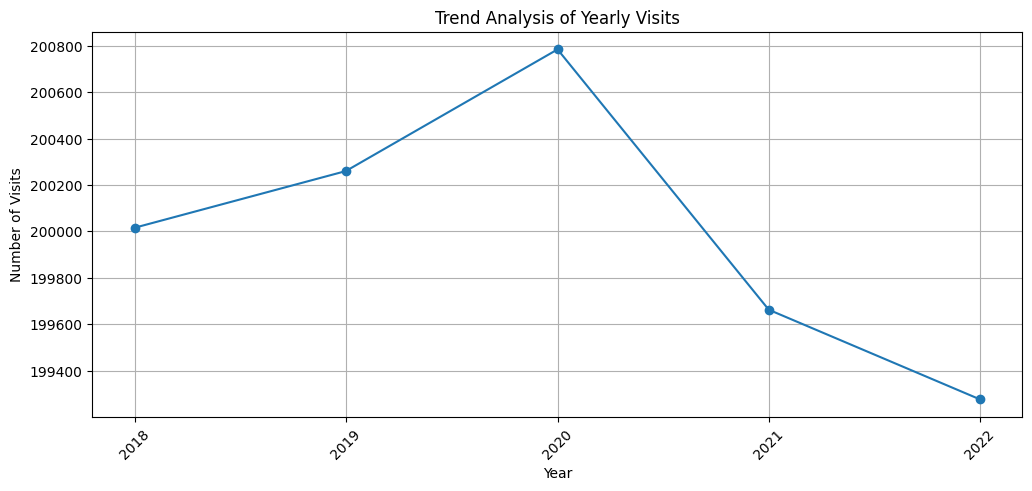

In [108]:
# Creating an Trend Analysis for Yearly Visits based on count of patient_ids
plt.figure(figsize=(12, 5))
plt.plot(df_resample_year.index, df_resample_year['Patient_ID'], marker='o', linestyle='-')
plt.title('Trend Analysis of Yearly Visits')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.grid(True)

# Formatting x-axis to show only years
plt.xticks(df_resample_year.index, df_resample_year.index.year, rotation=45)

plt.show()

Observing that the trend analysis peaked in 2020 before declining significantly in 2021 and 2022. To gain deeper insights into this decline in visits, let's refine the data by aggregating the years into months for a more detailed exploration.

In [87]:
df_resample_month = df_visit.resample("M").count()

<ipython-input-87-3b99bd5fb488>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resample_month = df_visit.resample("M").count()


In [88]:
df_resample_month

Patient_ID    Age  Gender  Diagnosis  Has_Insurance  Postcode  \
Visit_Date                                                                  
2018-01-31       16934  16934   16934      16934          16934     16934   
2018-02-28       15252  15252   15252      15252          15252     15252   
2018-03-31       17159  17159   17159      17159          17159     17159   
2018-04-30       16367  16367   16367      16367          16367     16367   
2018-05-31       16878  16878   16878      16878          16878     16878   
2018-06-30       16636  16636   16636      16636          16636     16636   
2018-07-31       16992  16992   16992      16992          16992     16992   
2018-08-31       16898  16898   16898      16898          16898     16898   
2018-09-30       16353  16353   16353      16353          16353     16353   
2018-10-31       17065  17065   17065      17065          17065     17065   
2018-11-30       16373  16373   16373      16373          16373     16373   
2018-12-31       17109  17109   17109      17109          17109     17109   
2019-01-31       16948  16948   16948      16948          16948     16948   
2019-02-28       15369  15369   15369      15369          15369     15369   
2019-03-31       16943  16943   16943      16943          16943     16943   
2019-04-30       16595  16595   16595      16595          16595     16595   
2019-05-31       16923  16923   16923      16923          16923     16923   
2019-06-30       16190  16190   16190      16190          16190     16190   
2019-07-31       17046  17046   17046      17046          17046     17046   
2019-08-31       17064  17064   17064      17064          17064     17064   
2019-09-30       16315  16315   16315      16315          16315     16315   
2019-10-31       17118  17118   17118      17118          17118     17118   
2019-11-30       16638  16638   16638      16638          16638     16638   
2019-12-31       17111  17111   17111      17111          17111     17111   
2020-01-31       17010  17010   17010      17010          17010     17010   
2020-02-29       15959  15959   15959      15959          15959     15959   
2020-03-31       16974  16974   16974      16974          16974     16974   
2020-04-30       16464  16464   16464      16464          16464     16464   
2020-05-31       17107  17107   17107      17107          17107     17107   
2020-06-30       16525  16525   16525      16525          16525     16525   
2020-07-31       16939  16939   16939      16939          16939     16939   
2020-08-31       16772  16772   16772      16772          16772     16772   
2020-09-30       16377  16377   16377      16377          16377     16377   
2020-10-31       17180  17180   17180      17180          17180     17180   
2020-11-30       16367  16367   16367      16367          16367     16367   
2020-12-31       17110  17110   17110      17110          17110     17110   
2021-01-31       17107  17107   17107      17107          17107     17107   
2021-02-28       15307  15307   15307      15307          15307     15307   
2021-03-31       17130  17130   17130      17130          17130     17130   
2021-04-30       16623  16623   16623      16623          16623     16623   
2021-05-31       16883  16883   16883      16883          16883     16883   
2021-06-30       16155  16155   16155      16155          16155     16155   
2021-07-31       16903  16903   16903      16903          16903     16903   
2021-08-31       17098  17098   17098      17098          17098     17098   
2021-09-30       16098  16098   16098      16098          16098     16098   
2021-10-31       16969  16969   16969      16969          16969     16969   
2021-11-30       16469  16469   16469      16469          16469     16469   
2021-12-31       16921  16921   16921      16921          16921     16921   
2022-01-31       16920  16920   16920      16920          16920     16920   
2022-02-28       15252  15252   15252      15252          15252     15252   
2022-03-

<ipython-input-98-859a6cbc612a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tick = pd.date_range(


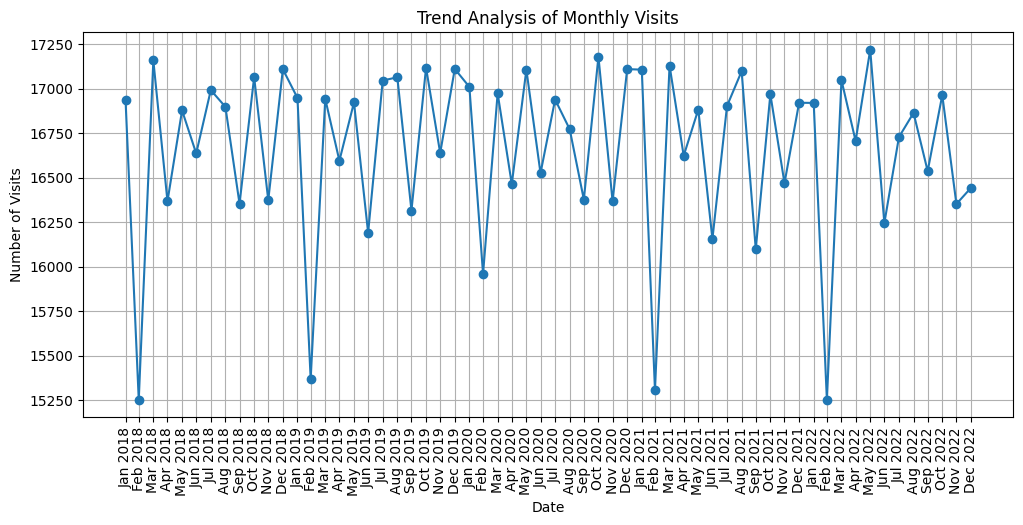

In [98]:
# Generate monthly tick marks
monthly_tick = pd.date_range(
    start=df_resample_month.index.min(),
    end=df_resample_month.index.max(),
    freq='M'
)

# Generate labels for x-axis
monthly_labels = [date.strftime('%b %Y') for date in monthly_tick]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_resample_month.index, df_resample_month['Patient_ID'], marker='o', linestyle='-')
plt.title('Trend Analysis of Monthly Visits')
plt.xticks(monthly_tick, monthly_labels, rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

I observed that February consistently experiences a significant decline in yearly visits. To understand the underlying reasons, let's analyze the trend for February over the past five years.

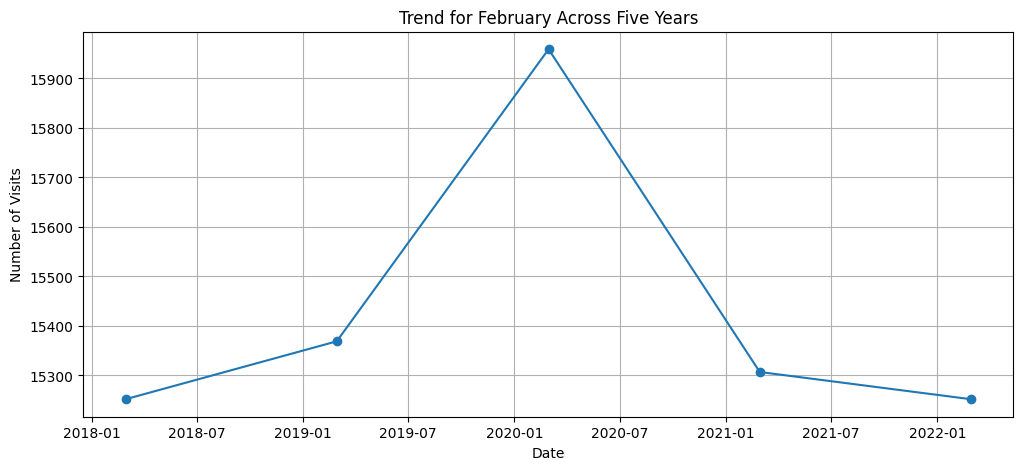

In [103]:
target_month = 2  # February

# Filter for the target month
df_target_month = df_resample_month[df_resample_month.index.month == target_month]

# Check if there are any data points before proceeding
if not df_target_month.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(df_target_month.index, df_target_month['Postcode'], marker='o', linestyle='-')
    plt.title(f'Trend for {df_target_month.index[0].strftime("%B")} Across Five Years')
    plt.xlabel('Date')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {pd.to_datetime(target_month, format='%m').strftime('%B')}.")

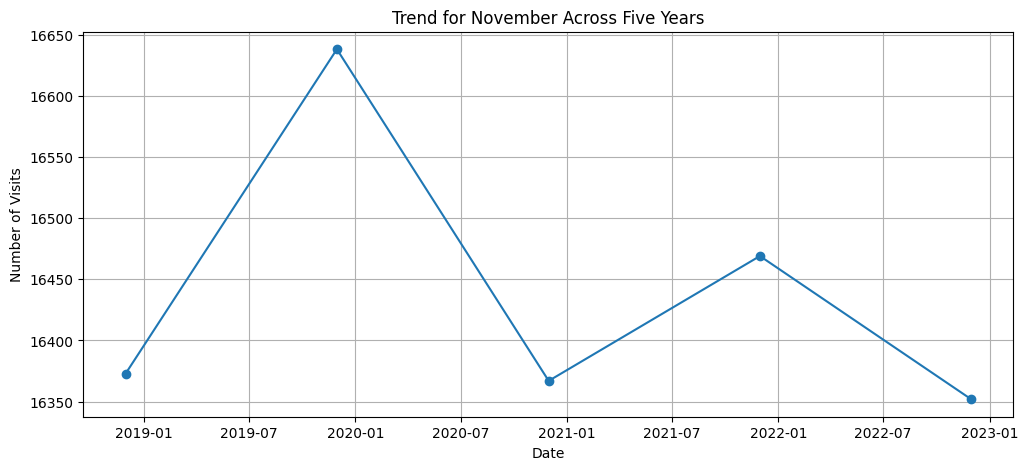

In [104]:
target_month = 11  # November

# Filter for the target month
df_target_month = df_resample_month[df_resample_month.index.month == target_month]

# Check if there are any data points before proceeding
if not df_target_month.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(df_target_month.index, df_target_month['Postcode'], marker='o', linestyle='-')
    plt.title(f'Trend for {df_target_month.index[0].strftime("%B")} Across Five Years')
    plt.xlabel('Date')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {pd.to_datetime(target_month, format='%m').strftime('%B')}.")

# Operational Efficiency and Financial Analysis

In [105]:
df_visit.head()

Patient_ID  Age  Gender                          Diagnosis  \
Visit_Date                                                               
2020-05-06      688923   68  Female                           Diabetes   
2018-08-04      886361   62  Female            Urinary Tract Infection   
2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
2018-04-30      454666   24    Male                            Malaria   

            Has_Insurance  Postcode  Total_Cost  Registration_minutes  \
Visit_Date                                                              
2020-05-06           True     20006      2274.0                    33   
2018-08-04          False     20005      3430.0                    46   
2021-04-10           True     10003      1836.0                   107   
2021-10-01          False     10006      3250.0                    66   
2018-04-30           True     10006      2262.0                    68   

            Nursing_minutes  Laboratory_minutes  Consultation_minutes  \
Visit_Date                                                              
2020-05-06              105                 101                    28   
2018-08-04               75                  84                   102   
2021-04-10               81                   5                    77   
2021-10-01               31                 101                    35   
2018-04-30               55                  60                    90   

            Pharmacy_minutes Age_Range  
Visit_Date                              
2020-05-06               112  (60, 70]  
2018-08-04                36  (60, 70]  
2021-04-10                36  (60, 70]  
2021-10-01                92   (0, 10]  
2018-04-30               104  (20, 30]

In [110]:
df_visit['Total_minutes'] = df_visit['Consultation_minutes'] + df_visit['Nursing_minutes'] + df_visit['Registration_minutes'] + df_visit['Laboratory_minutes'] + df_visit['Pharmacy_minutes']

In [111]:
df_visit.head()

Patient_ID  Age  Gender                          Diagnosis  \
Visit_Date                                                               
2020-05-06      688923   68  Female                           Diabetes   
2018-08-04      886361   62  Female            Urinary Tract Infection   
2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
2018-04-30      454666   24    Male                            Malaria   

            Has_Insurance  Postcode  Total_Cost  Registration_minutes  \
Visit_Date                                                              
2020-05-06           True     20006      2274.0                    33   
2018-08-04          False     20005      3430.0                    46   
2021-04-10           True     10003      1836.0                   107   
2021-10-01          False     10006      3250.0                    66   
2018-04-30           True     10006      2262.0                    68   

            Nursing_minutes  Laboratory_minutes  Consultation_minutes  \
Visit_Date                                                              
2020-05-06              105                 101                    28   
2018-08-04               75                  84                   102   
2021-04-10               81                   5                    77   
2021-10-01               31                 101                    35   
2018-04-30               55                  60                    90   

            Pharmacy_minutes Age_Range  Total_minutes  
Visit_Date                                             
2020-05-06               112  (60, 70]            379  
2018-08-04                36  (60, 70]            343  
2021-04-10                36  (60, 70]            306  
2021-10-01                92   (0, 10]            325  
2018-04-30               104  (20, 30]            377

In [112]:
df_visit['Total_Hours'] = df_visit['Total_minutes'] / 60
df_visit.head()

Patient_ID  Age  Gender                          Diagnosis  \
Visit_Date                                                               
2020-05-06      688923   68  Female                           Diabetes   
2018-08-04      886361   62  Female            Urinary Tract Infection   
2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
2018-04-30      454666   24    Male                            Malaria   

            Has_Insurance  Postcode  Total_Cost  Registration_minutes  \
Visit_Date                                                              
2020-05-06           True     20006      2274.0                    33   
2018-08-04          False     20005      3430.0                    46   
2021-04-10           True     10003      1836.0                   107   
2021-10-01          False     10006      3250.0                    66   
2018-04-30           True     10006      2262.0                    68   

            Nursing_minutes  Laboratory_minutes  Consultation_minutes  \
Visit_Date                                                              
2020-05-06              105                 101                    28   
2018-08-04               75                  84                   102   
2021-04-10               81                   5                    77   
2021-10-01               31                 101                    35   
2018-04-30               55                  60                    90   

            Pharmacy_minutes Age_Range  Total_minutes  Total_Hours  
Visit_Date                                                          
2020-05-06               112  (60, 70]            379     6.316667  
2018-08-04                36  (60, 70]            343     5.716667  
2021-04-10                36  (60, 70]            306     5.100000  
2021-10-01                92   (0, 10]            325     5.416667  
2018-04-30               104  (20, 30]            377     6.283333

In [113]:
# Average total time spent when visiting the hosptial?
average_total_time_in_hours = df_visit['Total_Hours'].mean()
average_total_time_in_hours

5.209838183333332

In [ ]:
# Find the Average Cost by Gender
avg_cost_by_gender = df_visit.groupby('Gender')['Total_Cost'].mean()
avg_cost_by_gender

In [123]:
# What visit took the longest time?
longest_visit = df_visit['Total_minutes'].max()
longest_visit

582

In [132]:
# Average consultation time for insured vs uninsured patients
avg_consult_insured = df_visit[df_visit["Has_Insurance"] == True]["Consultation_minutes"].mean()
avg_consult_uninsured = df_visit[df_visit["Has_Insurance"] == False]["Consultation_minutes"].mean()
print(f"\nAvg Consultation Time (Insured): {avg_consult_insured:.2f}")
print(f"Avg Consultation Time (Uninsured): {avg_consult_uninsured:.2f}")


Avg Consultation Time (Insured): 62.44
Avg Consultation Time (Uninsured): 62.52


In [119]:
# Average total cost for insured vs uninsured patients
avg_cost_insured = df_visit[df_visit["Has_Insurance"] == True]["Total_Cost"].mean()
avg_cost_uninsured = df_visit[df_visit["Has_Insurance"] == False]["Total_Cost"].mean()
print(f"Avg Cost (Insured): {avg_cost_insured:.2f}")
print(f"Avg Cost (Uninsured): {avg_cost_uninsured:.2f}")

Avg Cost (Insured): 1875.42
Avg Cost (Uninsured): 3126.03


In [125]:
# Average total cost per age range
avg_cost_per_age_range = df_visit.groupby("Age_Range")["Total_Cost"].mean()
print("\nAverage Total Cost by Age Range:")
print(avg_cost_per_age_range)


Average Total Cost by Age Range:
Age_Range
(0, 10]     2628.362499
(10, 20]    2625.078814
(20, 30]    2626.975351
(30, 40]    2626.259490
(40, 50]    2626.143070
(50, 60]    2626.630207
(60, 70]    2623.662356
(70, 80]    2625.741120
(80, 90]    2625.774898
Name: Total_Cost, dtype: float64


<ipython-input-125-c2a2e21d1e5f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_per_age_range = df_visit.groupby("Age_Range")["Total_Cost"].mean()



Average Time Spent per Procedure:
Registration_minutes    62.574824
Nursing_minutes         62.514987
Laboratory_minutes      62.506128
Consultation_minutes    62.488122
Pharmacy_minutes        62.506230
dtype: float64


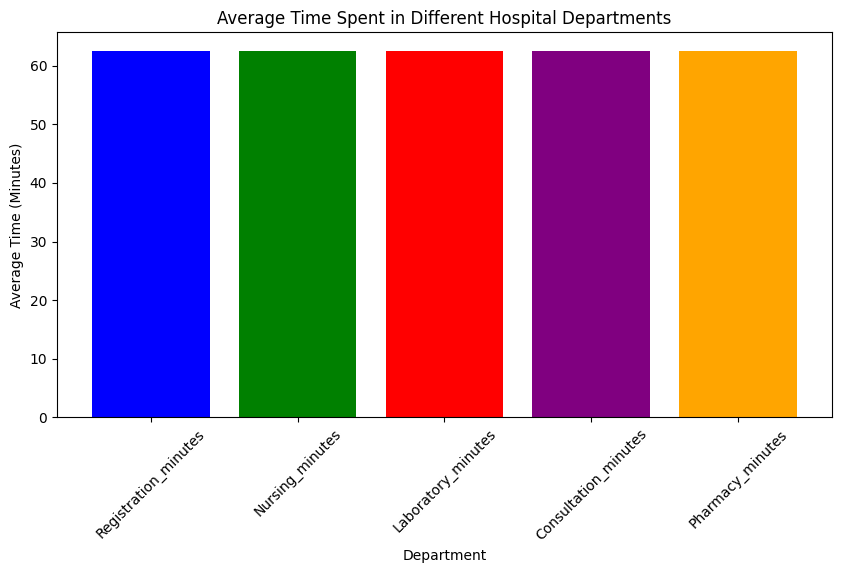

In [147]:
# What are the most time-consuming procedures on average?
avg_time_per_procedure = df_visit[
    ["Registration_minutes", "Nursing_minutes", "Laboratory_minutes", "Consultation_minutes", "Pharmacy_minutes"]
].mean()

print("\nAverage Time Spent per Procedure:")
print(avg_time_per_procedure)

plt.figure(figsize=(10, 5))
plt.bar(dept_times.index, dept_times.values, color=["blue", "green", "red", "purple", "orange"])
plt.xlabel("Department")
plt.ylabel("Average Time (Minutes)")
plt.title("Average Time Spent in Different Hospital Departments")
plt.xticks(rotation=45)
plt.show()


Top 10 Most Expensive Diagnoses (Average Cost):
Diagnosis
Backpain                             2632.430836
Ear Infection                        2628.842991
Malaria                              2628.715274
Upper Respiratory Tract Infection    2626.288035
Urinary Tract Infection              2625.159897
Hypertension                         2622.463111
Abdominal pain                       2621.657758
Diabetes                             2621.177607
Name: Total_Cost, dtype: float64


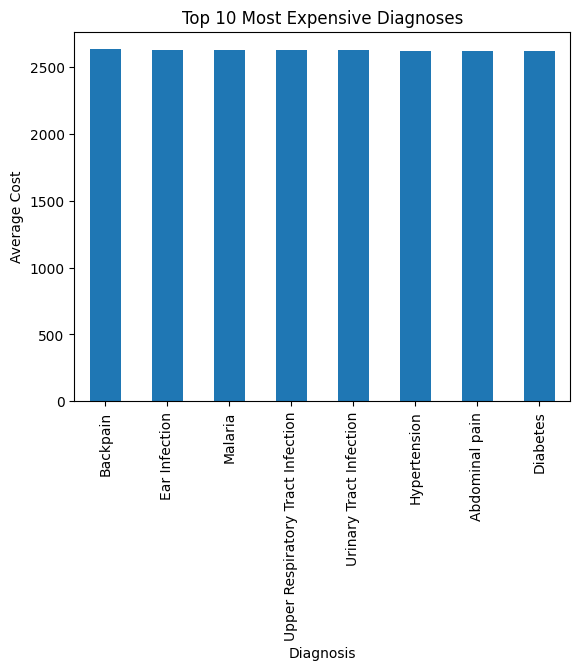

In [130]:
# Find the Top 10 diagnoses that were the most expensive on average?
top_expensive_diagnoses = df_visit.groupby("Diagnosis")["Total_Cost"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Most Expensive Diagnoses (Average Cost):")
print(top_expensive_diagnoses)

top_expensive_diagnoses.plot(kind="bar", title="Top 10 Most Expensive Diagnoses", ylabel="Average Cost")
plt.show()

<ipython-input-133-49539253cd11>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_age_group = df_visit.groupby("Age_Range")["Total_minutes"].mean().sort_values(ascending=False)



Average Total Time Spent by Age Group:
Age_Range
(40, 50]    312.760076
(20, 30]    312.705449
(0, 10]     312.695569
(70, 80]    312.663747
(30, 40]    312.534810
(80, 90]    312.530731
(10, 20]    312.490212
(50, 60]    312.455092
(60, 70]    312.369260
Name: Total_minutes, dtype: float64


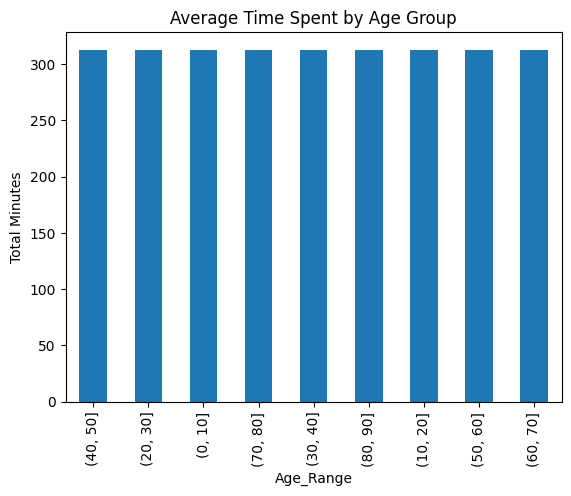

In [133]:
# Find the age group that has the highest average total time spent.
avg_time_by_age_group = df_visit.groupby("Age_Range")["Total_minutes"].mean().sort_values(ascending=False)
print("\nAverage Total Time Spent by Age Group:")
print(avg_time_by_age_group)

avg_time_by_age_group.plot(kind="bar", title="Average Time Spent by Age Group", ylabel="Total Minutes")
plt.show()

In [134]:
from os import wait
def department_wait_time_statistics(df, wait_time_column):
    if wait_time_column not in df.columns:
        return f"Column '{wait_time_column}' not found in the DataFrame."

    wait_time_minutes = df[wait_time_column]
    wait_time_hours = wait_time_minutes / 60

    min_time = wait_time_hours.min()
    max_time = wait_time_hours.max()
    mean_time = wait_time_hours.mean()
    median_time = wait_time_hours.median()
    std_dev = wait_time_hours.std()

    sentence = (
        f"For the department '{wait_time_column}', wait times range from {min_time:.2f} hours to {max_time:.2f} hours. "
        f"The average wait time is {mean_time:.2f} hours, with a median of {median_time:.2f} hours."
    )

    return sentence



In [136]:
department_wait_time_statistics(df_visit, 'Nursing(seconds)')

"Column 'Nursing(seconds)' not found in the DataFrame."

In [138]:
department_wait_time_statistics(df_visit, 'Nursing_minutes')

"For the department 'Nursing_minutes', wait times range from 0.08 hours to 2.00 hours. The average wait time is 1.04 hours, with a median of 1.05 hours."

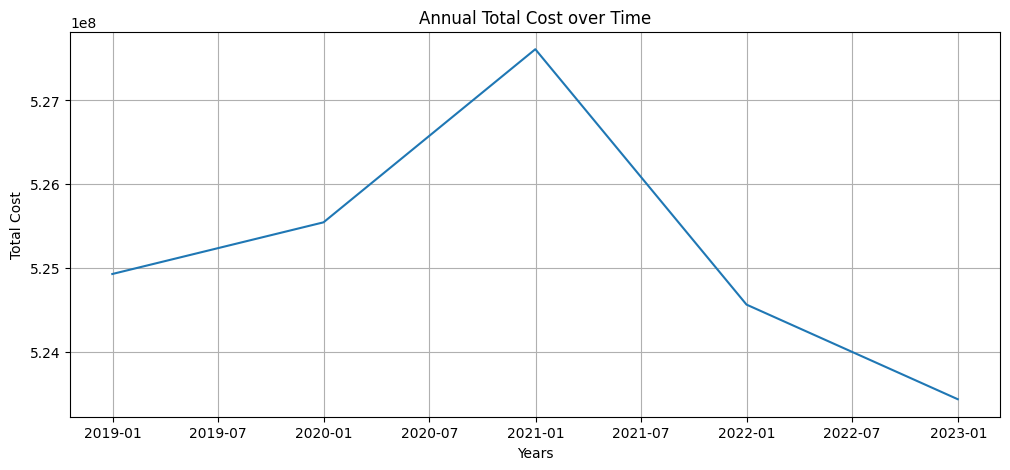

In [142]:
# What is the annual total cost over time?
annual_total_cost = df_visit['Total_Cost'].resample("YE").sum()
plt.figure(figsize=(12,5))
plt.plot(annual_total_cost.index,annual_total_cost.values)
plt.title("Annual Total Cost over Time")
plt.xlabel("Years")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

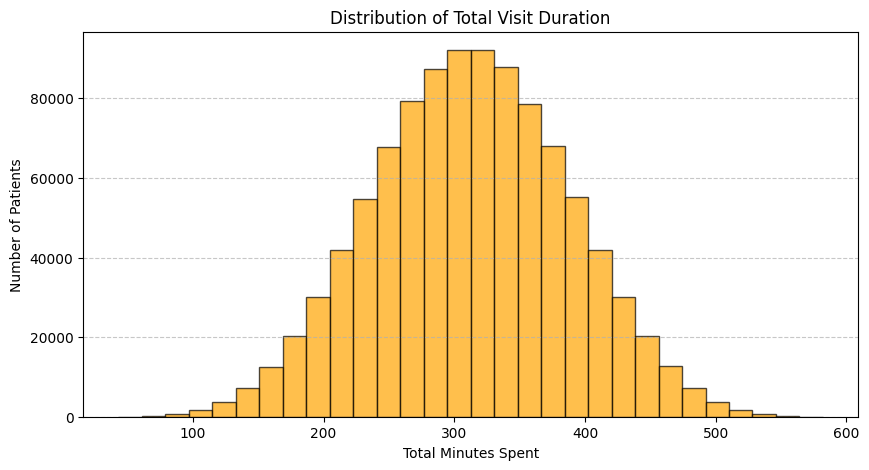

In [144]:
# What is the distribution of total visit duration across patients?

plt.figure(figsize=(10, 5))
plt.hist(df_visit["Total_minutes"], bins=30, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Total Minutes Spent")
plt.ylabel("Number of Patients")
plt.title("Distribution of Total Visit Duration")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-152-459d4bd93947>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([insured, uninsured], labels=["Insured", "Uninsured"], patch_artist=True, boxprops=dict(facecolor="lightblue"))


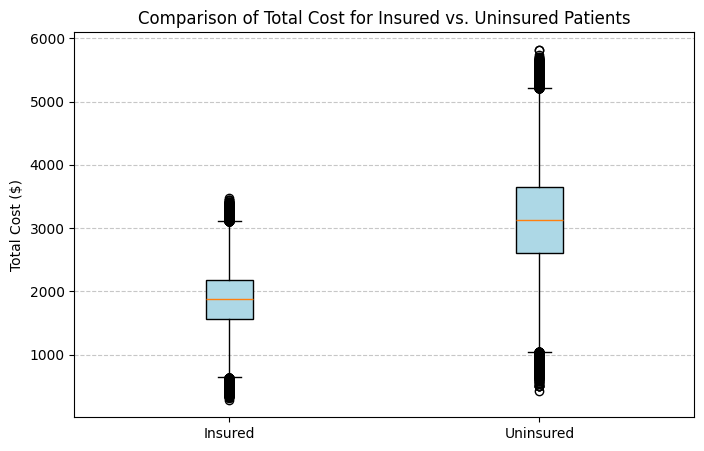

In [152]:
# How does insurance status affect total cost?

insured = df_visit[df_visit["Has_Insurance"] == True]["Total_Cost"]
uninsured = df_visit[df_visit["Has_Insurance"] == False]["Total_Cost"]

plt.figure(figsize=(8, 5))
plt.boxplot([insured, uninsured], labels=["Insured", "Uninsured"], patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("Total Cost ($)")
plt.title("Comparison of Total Cost for Insured vs. Uninsured Patients")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

